In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [23]:
data.shape

(101, 18)

In [24]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

<Axes: ylabel='count'>

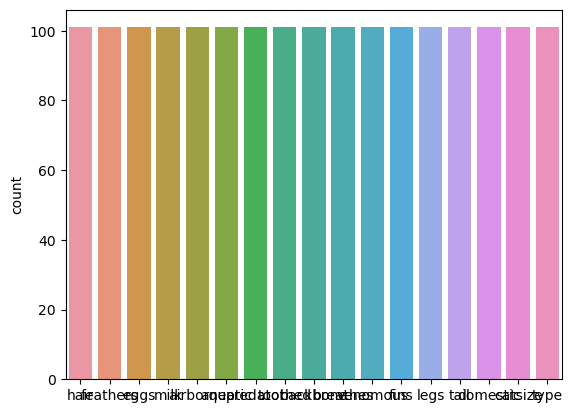

In [27]:
import seaborn as sns
sns.countplot(data)

<Axes: xlabel='hair', ylabel='eggs'>

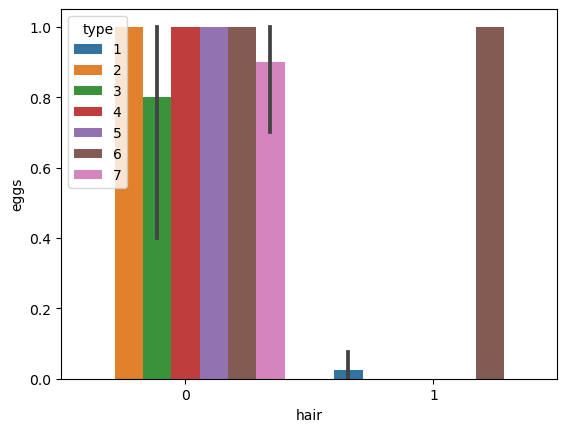

In [39]:
sns.barplot(x=data['hair'],y=data['eggs'],hue=data['type'])


In [3]:
##Divide the data into variables
x=data.iloc[:,2:17]
y=data.iloc[:,17]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
n_neighbors=np.array(range(2,40))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])}

In [43]:
##Build a classification model for classifying animals using KNN 
##We do not know how many nearest neighbours are to be considered, so build KNN model with range of values
from sklearn.neighbors import KNeighborsClassifier
kclf=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=kclf,param_grid=param_grid)
grid_search.fit(x_train,y_train)

C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [44]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.925
{'n_neighbors': 2}


In [45]:
grid_search.cv_results_

{'mean_fit_time': array([0.00411081, 0.00205855, 0.0015975 , 0.        , 0.00310812,
        0.00312476, 0.        , 0.00280538, 0.00413151, 0.00083928,
        0.00110178, 0.00130301, 0.00039983, 0.00454154, 0.00320067,
        0.00312486, 0.00312486, 0.        , 0.00292788, 0.00065117,
        0.        , 0.00312519, 0.        , 0.        , 0.00290413,
        0.00629983, 0.00010114, 0.        , 0.00023723, 0.00350561,
        0.00070553, 0.        , 0.        , 0.        , 0.00312557,
        0.        , 0.00180259, 0.        ]),
 'std_fit_time': array([0.00345807, 0.00115258, 0.00135343, 0.        , 0.00621624,
        0.00624952, 0.        , 0.00512119, 0.00583655, 0.00072298,
        0.0006643 , 0.0004009 , 0.00079966, 0.00619539, 0.00640135,
        0.00624971, 0.00624971, 0.        , 0.00585575, 0.00088927,
        0.        , 0.00625038, 0.        , 0.        , 0.00555875,
        0.00776437, 0.00020227, 0.        , 0.00047445, 0.00542686,
        0.00141106, 0.        , 0.   

In [46]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10)

In [47]:
##Build a model with no of neighbors 2
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model=knn_model.fit(x_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=2)

In [48]:
y_pred=knn_model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [49]:
##finding accuracy using train_test_split method:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9523809523809523

In [14]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn_model,x,y,cv=kfold)
print(score.mean())

0.9400000000000001


C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Swapna\anaconda3

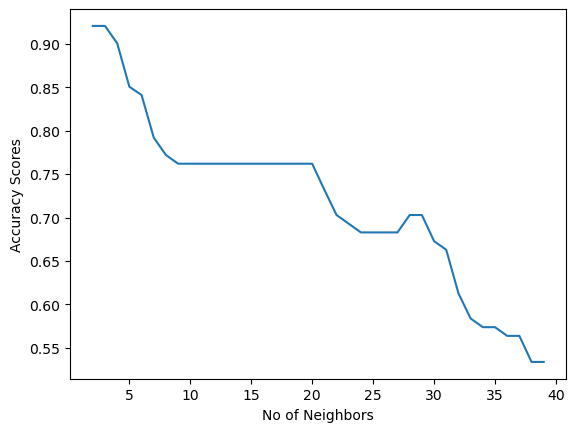

In [22]:
##Visualizing accuracy scores for all k values
import matplotlib.pyplot as plt
score=[]
n_neibors=range(2,40)
for i in range(2,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,x,y,cv=5)
    score.append(scores.mean())
    
plt.plot(n_neibors,score)
plt.xlabel("No of Neighbors") 
plt.ylabel("Accuracy Scores")
plt.show()
    

In [ ]:
##from the above figure it is evident that highest accuracy is for neighbors '2.'

# KNN Classification for Glass 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [52]:
glass_data.shape

(214, 10)

In [54]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [55]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [56]:
glass_data.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [59]:
glass_data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [93]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [98]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
glass_data_scale=scale.fit_transform(glass_data.iloc[:,0:9])
glass_data_scale=pd.DataFrame(glass_data_scale)
glass_data_scale['Type']=glass_data['Type']
glass_data_scale.columns=glass_data.columns
glass_data_scale

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


<Axes: xlabel='RI', ylabel='Mg'>

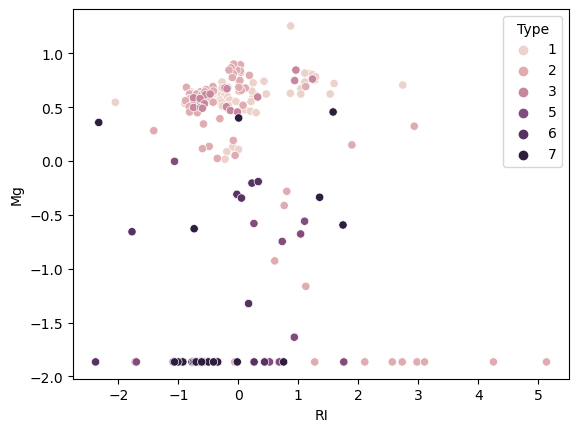

In [99]:
import seaborn as sns
sns.scatterplot(x=glass_data_scale.RI,y=glass_data_scale.Mg,hue=glass_data_scale.Type)

In [100]:
##partition data into x and y
x=glass_data.iloc[:,0:9]
y=glass_data.iloc[:,9]
x,y

(          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
 ..       ...    ...   ...   ...    ...   ...   ...   ...  ...
 209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0
 
 [214 rows x 9 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 209    7
 210    7
 211    7
 212    7
 213    7
 Name: Type, Length: 214, dtype: int64)

In [114]:
##use Kfold validation
n_folds=5
from sklearn.model_selection import KFold
kfold=KFold(n_splits=n_folds)
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [115]:
##Initiate KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
n_neibours=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neibours)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [116]:
from sklearn.model_selection import GridSearchCV
param_grid=GridSearchCV(knn_clf,param_grid)
param_grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [117]:
param_grid.best_score_,param_grid.best_estimator_

(0.640531561461794, KNeighborsClassifier(n_neighbors=1))

In [118]:
pd.DataFrame(param_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005236,0.002889,0.005480,0.001150,1,{'n_neighbors': 1},0.558140,0.627907,0.651163,0.651163,0.714286,0.640532,0.050227,1
1,0.003753,0.006122,0.001000,0.002001,2,{'n_neighbors': 2},0.604651,0.581395,0.674419,0.604651,0.690476,0.631118,0.043062,2
2,0.003121,0.006243,0.006369,0.005958,3,{'n_neighbors': 3},0.511628,0.627907,0.581395,0.534884,0.738095,0.598782,0.080296,17
3,0.003331,0.006663,0.000000,0.000000,4,{'n_neighbors': 4},0.534884,0.604651,0.604651,0.558140,0.714286,0.603322,0.061712,11
4,0.000000,0.000000,0.006152,0.007538,5,{'n_neighbors': 5},0.534884,0.627907,0.604651,0.581395,0.714286,0.612625,0.059416,9
5,0.000000,0.000000,0.003210,0.006420,6,{'n_neighbors': 6},0.558140,0.604651,0.581395,0.581395,0.761905,0.617497,0.073687,6
6,0.000000,0.000000,0.003103,0.006205,7,{'n_neighbors': 7},0.511628,0.604651,0.627907,0.581395,0.690476,0.603212,0.058465,12
7,0.006032,0.007396,0.000302,0.000605,8,{'n_neighbors': 8},0.511628,0.627907,0.581395,0.581395,0.690476,0.598560,0.059087,18
8,0.000000,0.000000,0.003125,0.006250,9,{'n_neighbors': 9},0.511628,0.604651,0.581395,0.558140,0.690476,0.589258,0.059226,23
9,0.000000,0.000000,0.003125,0.006250,10,{'n_neighbors': 10},0.511628,0.651163,0.581395,0.558140,0.666667,0.593798,0.057927,20


In [119]:
##Perform KNN classification using n_neighbors=3
glass_model=KNeighborsClassifier(n_neighbors=3)
glass_model.fit(x,y)
glass_model

KNeighborsClassifier(n_neighbors=3)

In [121]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(glass_model,x,y,cv=5)
score.mean()

0.598781838316722

In [ ]:
##We can see that both grid search and individual search with neighbours 3 have same mean accuracy score